In [1]:
# !pip install keras
# !pip install tensorflow

In [2]:
import pandas as pd
import numpy as np 
import sklearn
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

2024-09-15 13:36:39.606974: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
header = ["age",
"workclass",
"fnlwgt",
"education", 
"education-num",
"marital-status",
"occupation",
"relationship",
"race",
"sex",
"capital-gain",
"capital-loss",
"hours-per-week",
"native-country",
"income"]

In [4]:
df = pd.read_csv("adult.data", sep=',', names =header, index_col=False)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [7]:
unique_values = df.apply(lambda col:col.unique())
unique_values

age               [39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 2...
workclass         [ State-gov,  Self-emp-not-inc,  Private,  Fed...
fnlwgt            [77516, 83311, 215646, 234721, 338409, 284582,...
education         [ Bachelors,  HS-grad,  11th,  Masters,  9th, ...
education-num     [13, 9, 7, 14, 5, 10, 12, 11, 4, 16, 15, 3, 6,...
marital-status    [ Never-married,  Married-civ-spouse,  Divorce...
occupation        [ Adm-clerical,  Exec-managerial,  Handlers-cl...
relationship      [ Not-in-family,  Husband,  Wife,  Own-child, ...
race              [ White,  Black,  Asian-Pac-Islander,  Amer-In...
sex                                                [ Male,  Female]
capital-gain      [2174, 0, 14084, 5178, 5013, 2407, 14344, 1502...
capital-loss      [0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, ...
hours-per-week    [40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 4...
native-country    [ United-States,  Cuba,  Jamaica,  India,  ?, ...
income                                          

In [8]:
df['native-country'].unique() #replace ? with NaN

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [9]:
df['occupation'].unique() #replace ? with NaN

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [10]:
df['workclass'].unique() #replace ? with NaN

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
def replace_question_mark_with_nan(df, column_name):
    # Replace '?' with np.nan in the specified column
    df[column_name] = df[column_name].replace(' ?', np.nan)
    return df

In [12]:
names_to_replace = ['native-country', 'occupation', 'workclass']

df = replace_question_mark_with_nan(df, names_to_replace)

In [13]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [14]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [15]:
df['income'].unique() #replace ? with NaN

array([' <=50K', ' >50K'], dtype=object)

In [16]:
def binary_column_mapping(df, column_name, value_for_one, value_for_zero):
    # Map the specified values in the column to 1 and 0
    df[column_name] = df[column_name].apply(lambda x: 1 if x == value_for_one else 0 if x == value_for_zero else x)
    return df

df = binary_column_mapping(df, 'income', ' <=50K', ' >50K')

In [17]:
df.shape

(32561, 15)

In [18]:
df = df.dropna()

In [19]:
df.shape

(30162, 15)

In [20]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [21]:
df = df.select_dtypes(include=['int64'])

In [22]:
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,2174,0,40,1
1,50,83311,13,0,0,13,1
2,38,215646,9,0,0,40,1
3,53,234721,7,0,0,40,1
4,28,338409,13,0,0,40,1
...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,1
32557,40,154374,9,0,0,40,0
32558,58,151910,9,0,0,40,1
32559,22,201490,9,0,0,20,1


In [23]:
X = df.iloc[:,0:6]   #0-8 columns are dependent variables - remember 8th column is not included
Y = df.iloc[:,6]#8 column is independent variable
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
# create model
model = Sequential()
# model.add(Dense(1000, input_dim=8, activation='relu')) # 1000 neurons
# model.add(Dense(100, activation='tanh')) # 100 neurons with tanh activation function
model.add(Dense(1000, input_dim=6, activation='relu')) # 500 neurons
# 93.36% accuracy with 500 neurons
# 86.99% accuracy with 100 neurons
# 85.2% accuracy with 50 neurons
# 81.38% accuracy with 10 neurons
model.add(Dense(1, activation='sigmoid')) # 1 output neuron

/home/hduser/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10,  verbose=2) # 150 epoch, 10 batch size, verbose = 2

Epoch 1/150
3017/3017 - 5s - 1ms/step - accuracy: 0.8151 - loss: 0.4025
Epoch 2/150
3017/3017 - 4s - 1ms/step - accuracy: 0.8174 - loss: 0.3965
Epoch 3/150
3017/3017 - 5s - 2ms/step - accuracy: 0.8174 - loss: 0.3932
Epoch 4/150
3017/3017 - 4s - 1ms/step - accuracy: 0.8196 - loss: 0.3923
Epoch 5/150
3017/3017 - 4s - 1ms/step - accuracy: 0.8190 - loss: 0.3904
Epoch 6/150
3017/3017 - 4s - 1ms/step - accuracy: 0.8206 - loss: 0.3892
Epoch 7/150
3017/3017 - 4s - 1ms/step - accuracy: 0.8191 - loss: 0.3891
Epoch 8/150
3017/3017 - 4s - 1ms/step - accuracy: 0.8201 - loss: 0.3882
Epoch 9/150
3017/3017 - 4s - 1ms/step - accuracy: 0.8208 - loss: 0.3879
Epoch 10/150
3017/3017 - 5s - 2ms/step - accuracy: 0.8202 - loss: 0.3876
Epoch 11/150
3017/3017 - 4s - 1ms/step - accuracy: 0.8207 - loss: 0.3861
Epoch 12/150
3017/3017 - 4s - 1ms/step - accuracy: 0.8212 - loss: 0.3862
Epoch 13/150
3017/3017 - 4s - 1ms/step - accuracy: 0.8207 - loss: 0.3863
Epoch 14/150
3017/3017 - 4s - 1ms/step - accuracy: 0.8216 - 

In [35]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8276 - loss: 0.3707
compile_metrics: 83.00%


In [36]:
# calculate predictions
predictions = model.predict(X)    # predicting Y only using X
print(predictions)

943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[[6.9540083e-01]
 [6.4338690e-01]
 [8.4619808e-01]
 ...
 [7.8349942e-01]
 [9.9979132e-01]
 [6.9509266e-04]]


In [38]:
# Round predictions
#rounded = [int(numpy.round(x, 0)) for x in predictions]
rounded = [round(x[0]) for x in predictions]
print(rounded)

print("Rounded type: ", type(rounded)) # rounded is a 'list' class
print("Shape of rounded: ", len(rounded))
print("Dataset type: ", type(dataset)) # numpy array?
print("Shape of dataset: ", dataset.shape)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

NameError: name 'dataset' is not defined

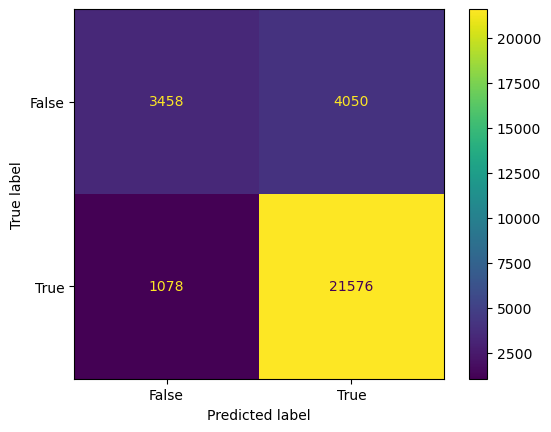

In [39]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = Y
predicted = rounded

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [40]:
# summarize the first 5 cases
for i in range(5):
	print(str(rounded[i]) + '=>(expected '+ str(Y[i]) +')')

1=>(expected 1)
1=>(expected 1)
1=>(expected 1)
1=>(expected 1)
1=>(expected 1)
